In [4]:
## lo básico
import pandas as pd
import numpy as np

## visualización
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## pre procesado
from sklearn.model_selection import train_test_split
#from ydata_profiling import ProfileReport

## modelado
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


## métricas
from pandas.plotting import scatter_matrix
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import label_binarize

## mejora de modelos
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score


## automatización
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# 1. Análisis exploratorio de los datos

In [6]:
url = "https://raw.githubusercontent.com/Valeriavinasl/ucm-tfm/main/data/Limpieza_Encuesta.csv"

df = pd.read_csv(url, sep=None, engine="python")
df.head()

,edad,genero,pais,is_condicion_fisica,detalle_condicion,nivel_expereincia_previo,condicion_previa,motivo,n_acompañantes,epoca,...,is_tr_mochila,is_reserva_aloj,alojamiento,hace_cuanto,is_volver_a_hacer,etapa_ideal,nota,is_lesion,consejos,modo_realizacion
0,32.0,Mujer,España,0.0,No,Básica (≤ 10 km ocasionalmente),Media,"Religioso, Deportivo, Cultural/turístico, Pers...",3.0,Verano,...,0,1,"Albergues privados, Hostales / Hoteles",Más de 2 años,1.0,Medias (~20 km con algo de desnivel),9,NaN,Sin respuesta,A pie
1,32.0,Hombre,España,Ninguna,No,Avanzada (rutas largas con mochila/montaña),Media,"Deportivo, Cultural/turístico, Personal/reflexivo",3.0,Verano,...,0,1,"Albergues públicos, Albergues privados, Hostal...",Más de 2 años,1.0,Medias (~20 km con algo de desnivel),9,0.0,Hacer etapas parecidas en distancia y terreno ...,A pie
2,32.0,Hombre,España,Ninguna,No,Moderada (10–20 km regularmente),Media,"Religioso, Cultural/turístico",6.0,Primavera,...,1,1,Hostales / Hoteles,Más de 2 años,1.0,Medias (~20 km con algo de desnivel),8,NaN,Sin respuesta,A pie
3,32.0,Mujer,Colombia,Ninguna,Migrañas tensionales,Básica (≤ 10 km ocasionalmente),Media,Personal/reflexivo,Desconocido,Primavera,...,1,1,"Albergues privados, Hostales / Hoteles",Este año,1.0,Medias (~20 km con algo de desnivel),9,0.0,Sin respuesta,A pie
4,21.0,Mujer,España,Ninguna,No,Básica (≤ 10 km ocasionalmente),Media,"Religioso, Cultural/turístico, Personal/reflexivo",6.0,Verano,...,1,1,Albergues privados,En los últimos 2 años,1.0,Medias (~20 km con algo de desnivel),10,NaN,Prefiero no revelar y que cada uno viva su cam...,A pie


In [38]:
v_numericas = ["edad", "dias", "distancia", "nota"]

In [39]:
v_categoricas = ["genero", "pais", "ruta", "epoca",
                    "calzado", "modo_realizacion", "alojamiento"]

In [41]:
v_binarias = ["is_condicion_fisica", "is_calzado_adecuado",
               "is_tr_mochila", "is_reserva_aloj",
               "is_camino_realizado_prev", "is_volver_a_hacer",
               "is_lesion"]

for col in v_binarias:
    df[col] = df[col].map({"Sí": 1, "Si": 1, "No": 0})


# 2. Exploración de variables
## 2.1 Variables numéricas

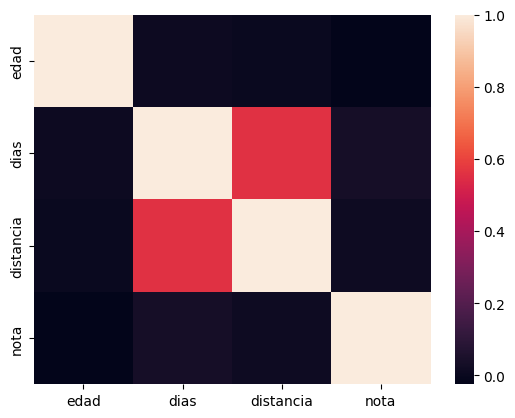

In [42]:
df_matriz = df[v_numericas]
matriz = df_matriz.corr()
sns.heatmap(matriz)
plt.show()

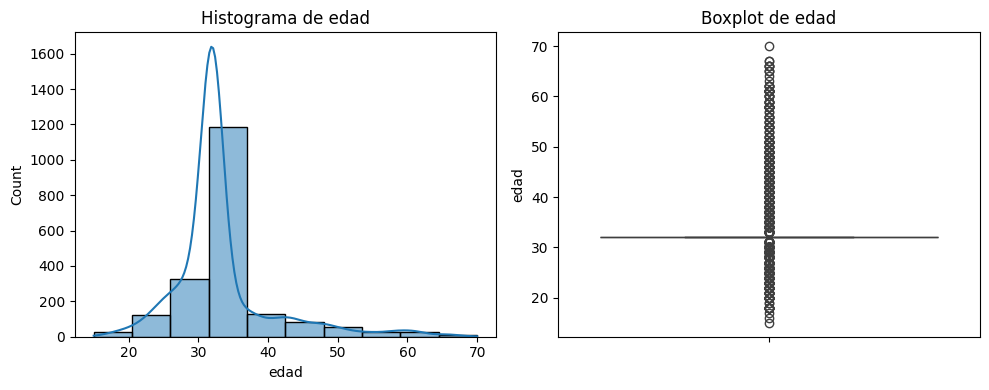

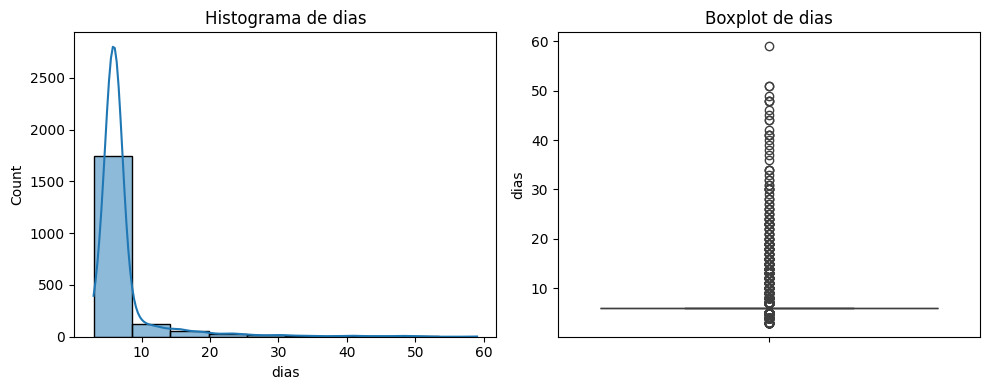

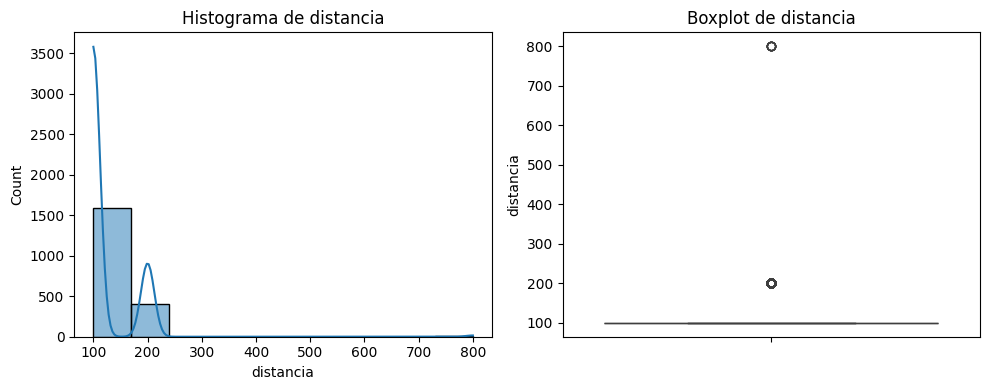

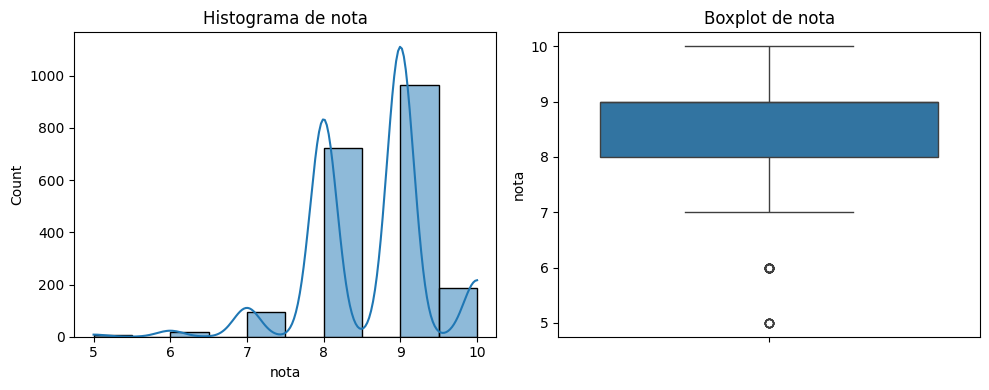

In [43]:
for col in v_numericas:
    if df[col].dtype == 'bool':
        df[col] = df[col].astype(int)

for col in v_numericas:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    sns.histplot(df[col], bins=10, kde=True, ax=axes[0])
    axes[0].set_title(f"Histograma de {col}")

    sns.boxplot(y=df[col], ax=axes[1])
    axes[1].set_title(f"Boxplot de {col}")

    plt.tight_layout()
    plt.show()

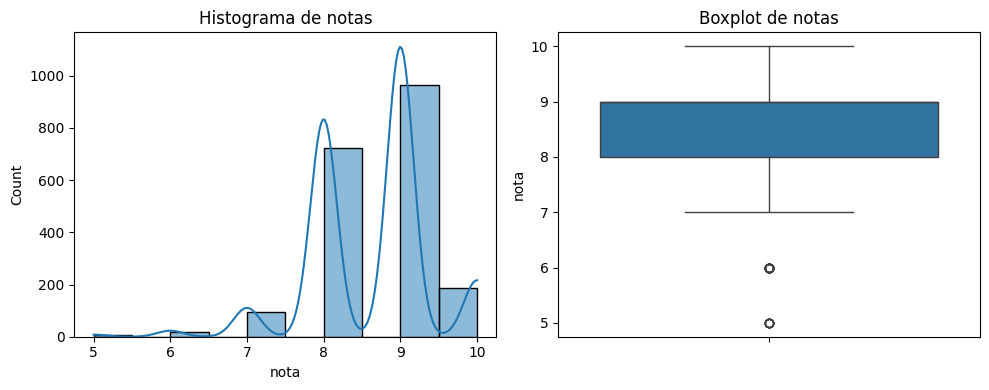

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.histplot(df["nota"], bins=10, kde=True, ax=axes[0])
axes[0].set_title("Histograma de notas")

sns.boxplot(y=df["nota"], ax=axes[1])
axes[1].set_title("Boxplot de notas")

plt.tight_layout()
plt.show()

## 2.2 Variables categóricas

/tmp/ipython-input-1669227913.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="genero", data=df, palette="Set2")


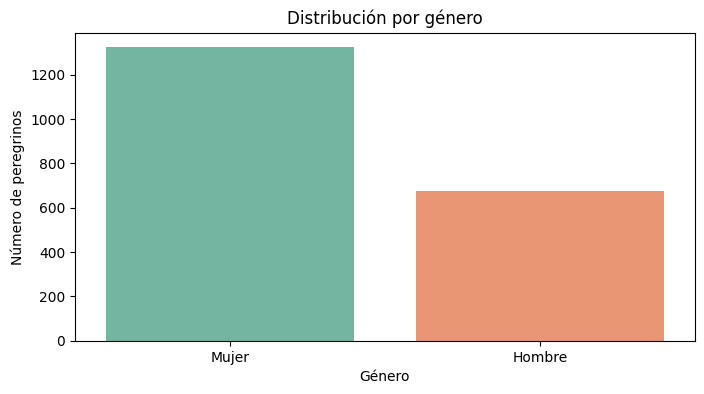

In [28]:
plt.figure(figsize=(8,4))
sns.countplot(x="genero", data=df, palette="Set2")
plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-1719571199.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="pais", data=df_top, order=top_paises, palette="Set2")


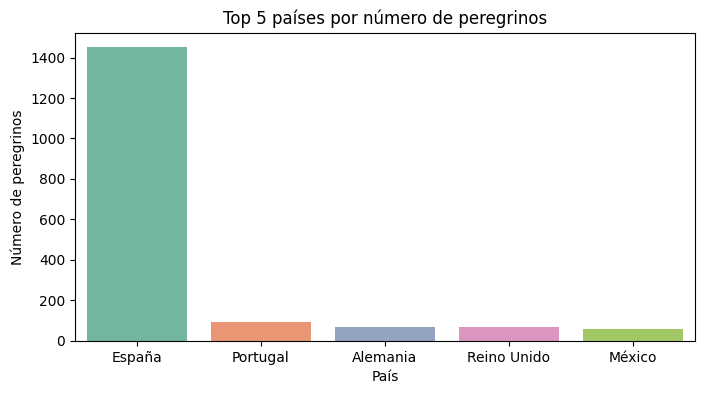

In [25]:
top_paises = df["pais"].value_counts().nlargest(5).index
df_top = df[df["pais"].isin(top_paises)]

plt.figure(figsize=(8,4))
sns.countplot(x="pais", data=df_top, order=top_paises, palette="Set2")
plt.title("Top 5 países por número de peregrinos")
plt.xlabel("País")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-738232134.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="ruta", data=df, palette="Set2")


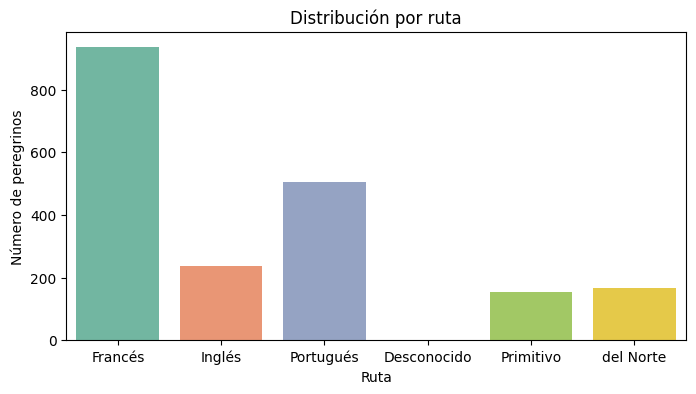

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x="ruta", data=df, palette="Set2")
plt.title("Distribución por ruta")
plt.xlabel("Ruta")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-1791514901.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="inicio", data=df, palette="Set2")


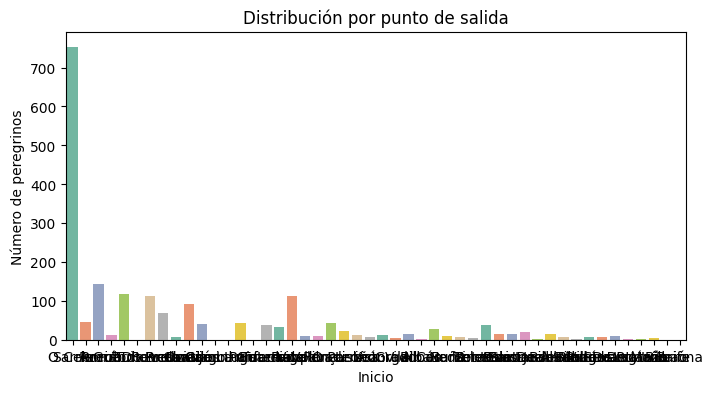

In [29]:
plt.figure(figsize=(8,4))
sns.countplot(x="inicio", data=df, palette="Set2")
plt.title("Distribución por punto de salida")
plt.xlabel("Inicio")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-380939767.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="modo_realizacion", data=df, palette="Set2")


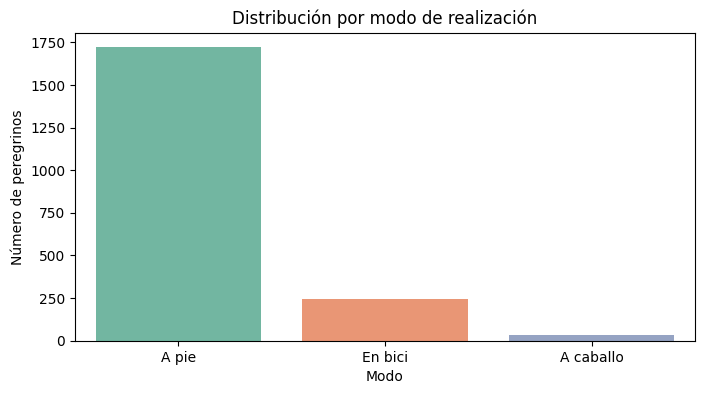

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(x="modo_realizacion", data=df, palette="Set2")
plt.title("Distribución por modo de realización")
plt.xlabel("Modo")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-295914247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="calzado", data=df, palette="Set2")


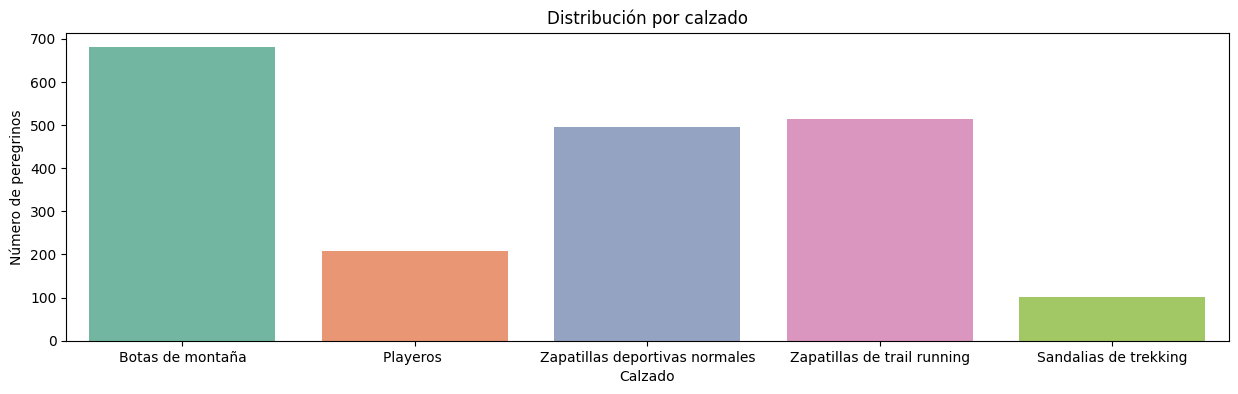

In [34]:
plt.figure(figsize=(15,4))
sns.countplot(x="calzado", data=df, palette="Set2")
plt.title("Distribución por calzado")
plt.xlabel("Calzado")
plt.ylabel("Número de peregrinos")
plt.show()

/tmp/ipython-input-2057144329.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="alojamiento", data=df, palette="Set2")


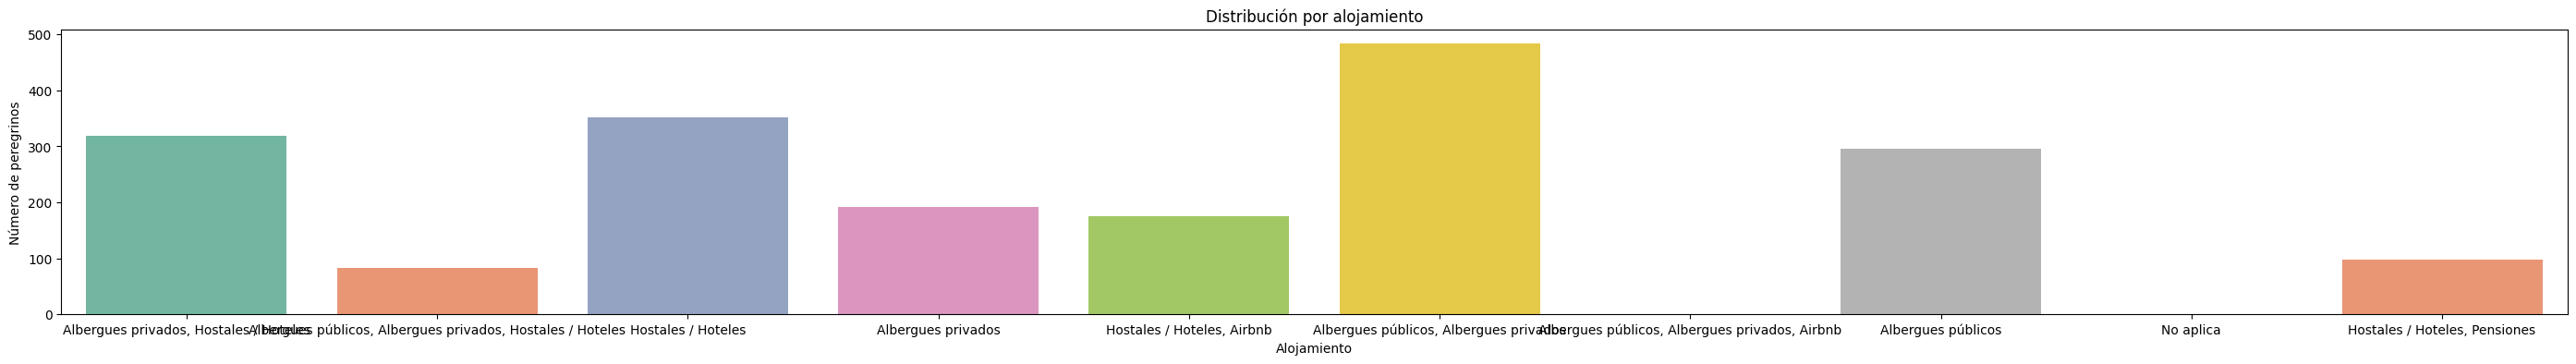

In [37]:
plt.figure(figsize=(35,4))
sns.countplot(x="alojamiento", data=df, palette="Set2")
plt.title("Distribución por alojamiento")
plt.xlabel("Alojamiento")
plt.ylabel("Número de peregrinos")
plt.show()

## 2.3 Variables binarias

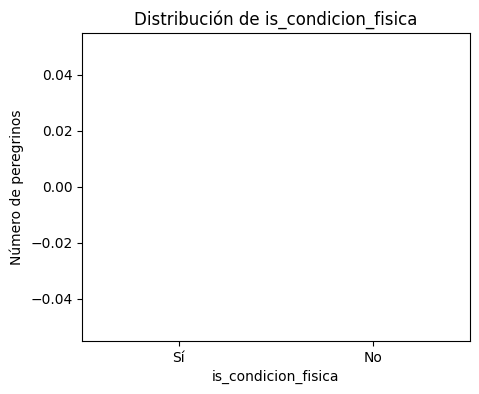

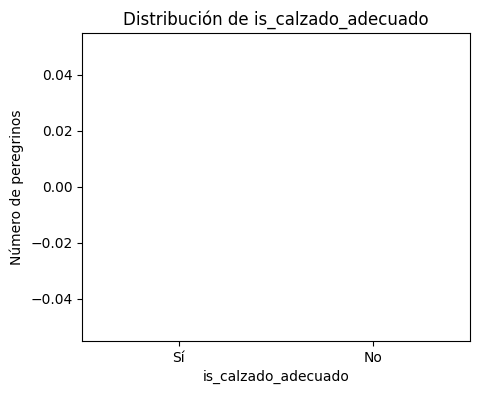

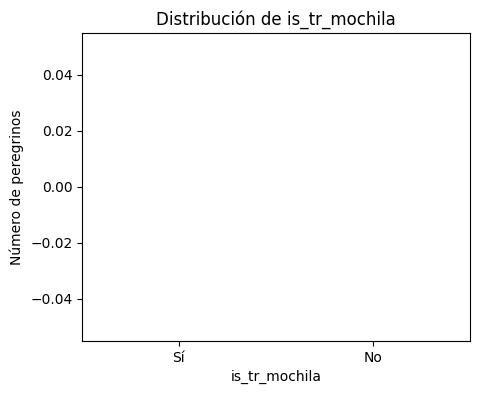

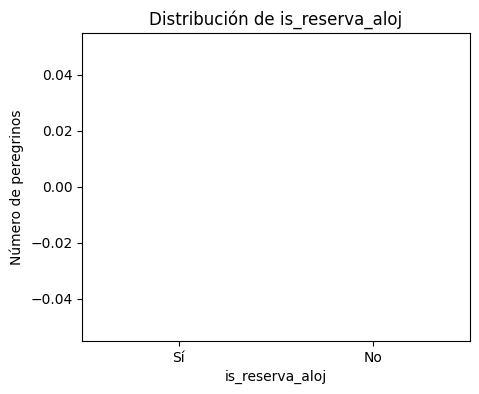

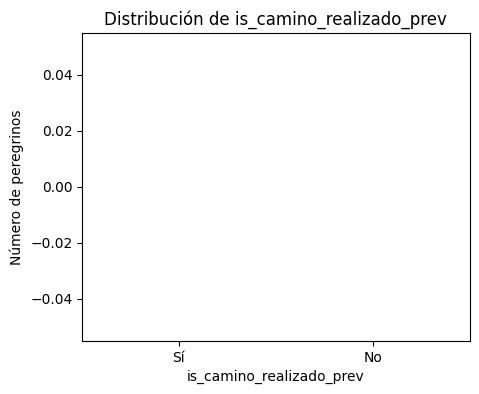

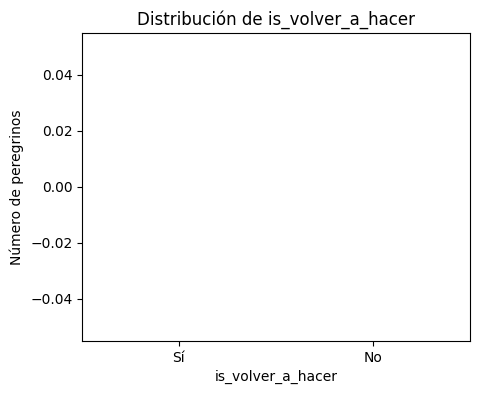

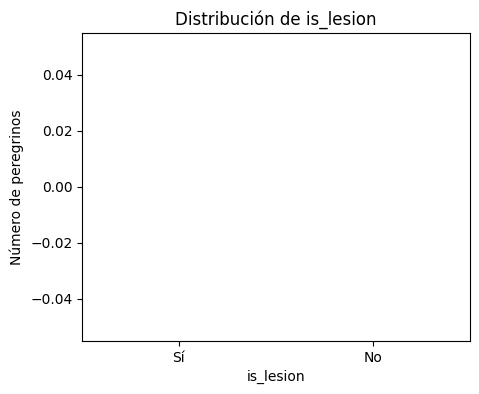

In [50]:
for col in v_binarias:
    vc = df[col].value_counts().reindex([1,0])
    plt.figure(figsize=(5,4))
    vc.plot(kind="bar", color=["steelblue","lightgrey"])
    plt.title(f"Distribución de {col}")
    plt.xticks([0,1], ["Sí", "No"], rotation=0)
    plt.ylabel("Número de peregrinos")
    plt.show()

## 3. Relación entre variables ??????????

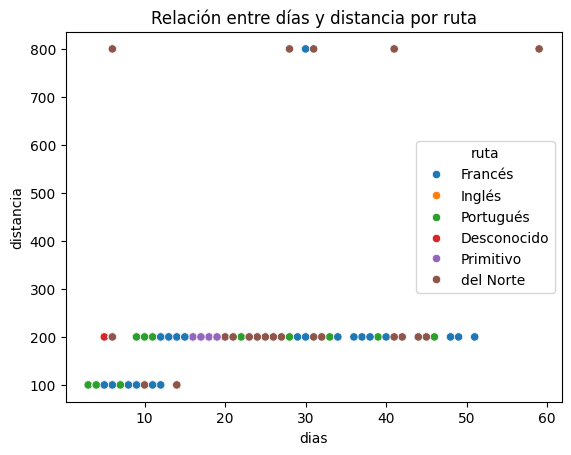

In [44]:
sns.scatterplot(data=df, x="dias", y="distancia", hue="ruta")
plt.title("Relación entre días y distancia por ruta")
plt.show()